In [18]:
"""
Climate Data Analysis and Visualization Module
==============================================
Purpose: Load, analyze, and visualize climate variables using scientific standards
Author: Melvin (AIMS)
Date: November 2025

Dependencies:
    - pandas: Data manipulation and analysis
    - numpy: Numerical computing
    - scipy: Statistical analysis
    - matplotlib: Visualization backend
    - seaborn: Statistical visualization
"""

import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

✓ Saved: 01_correlation_matrix.pdf


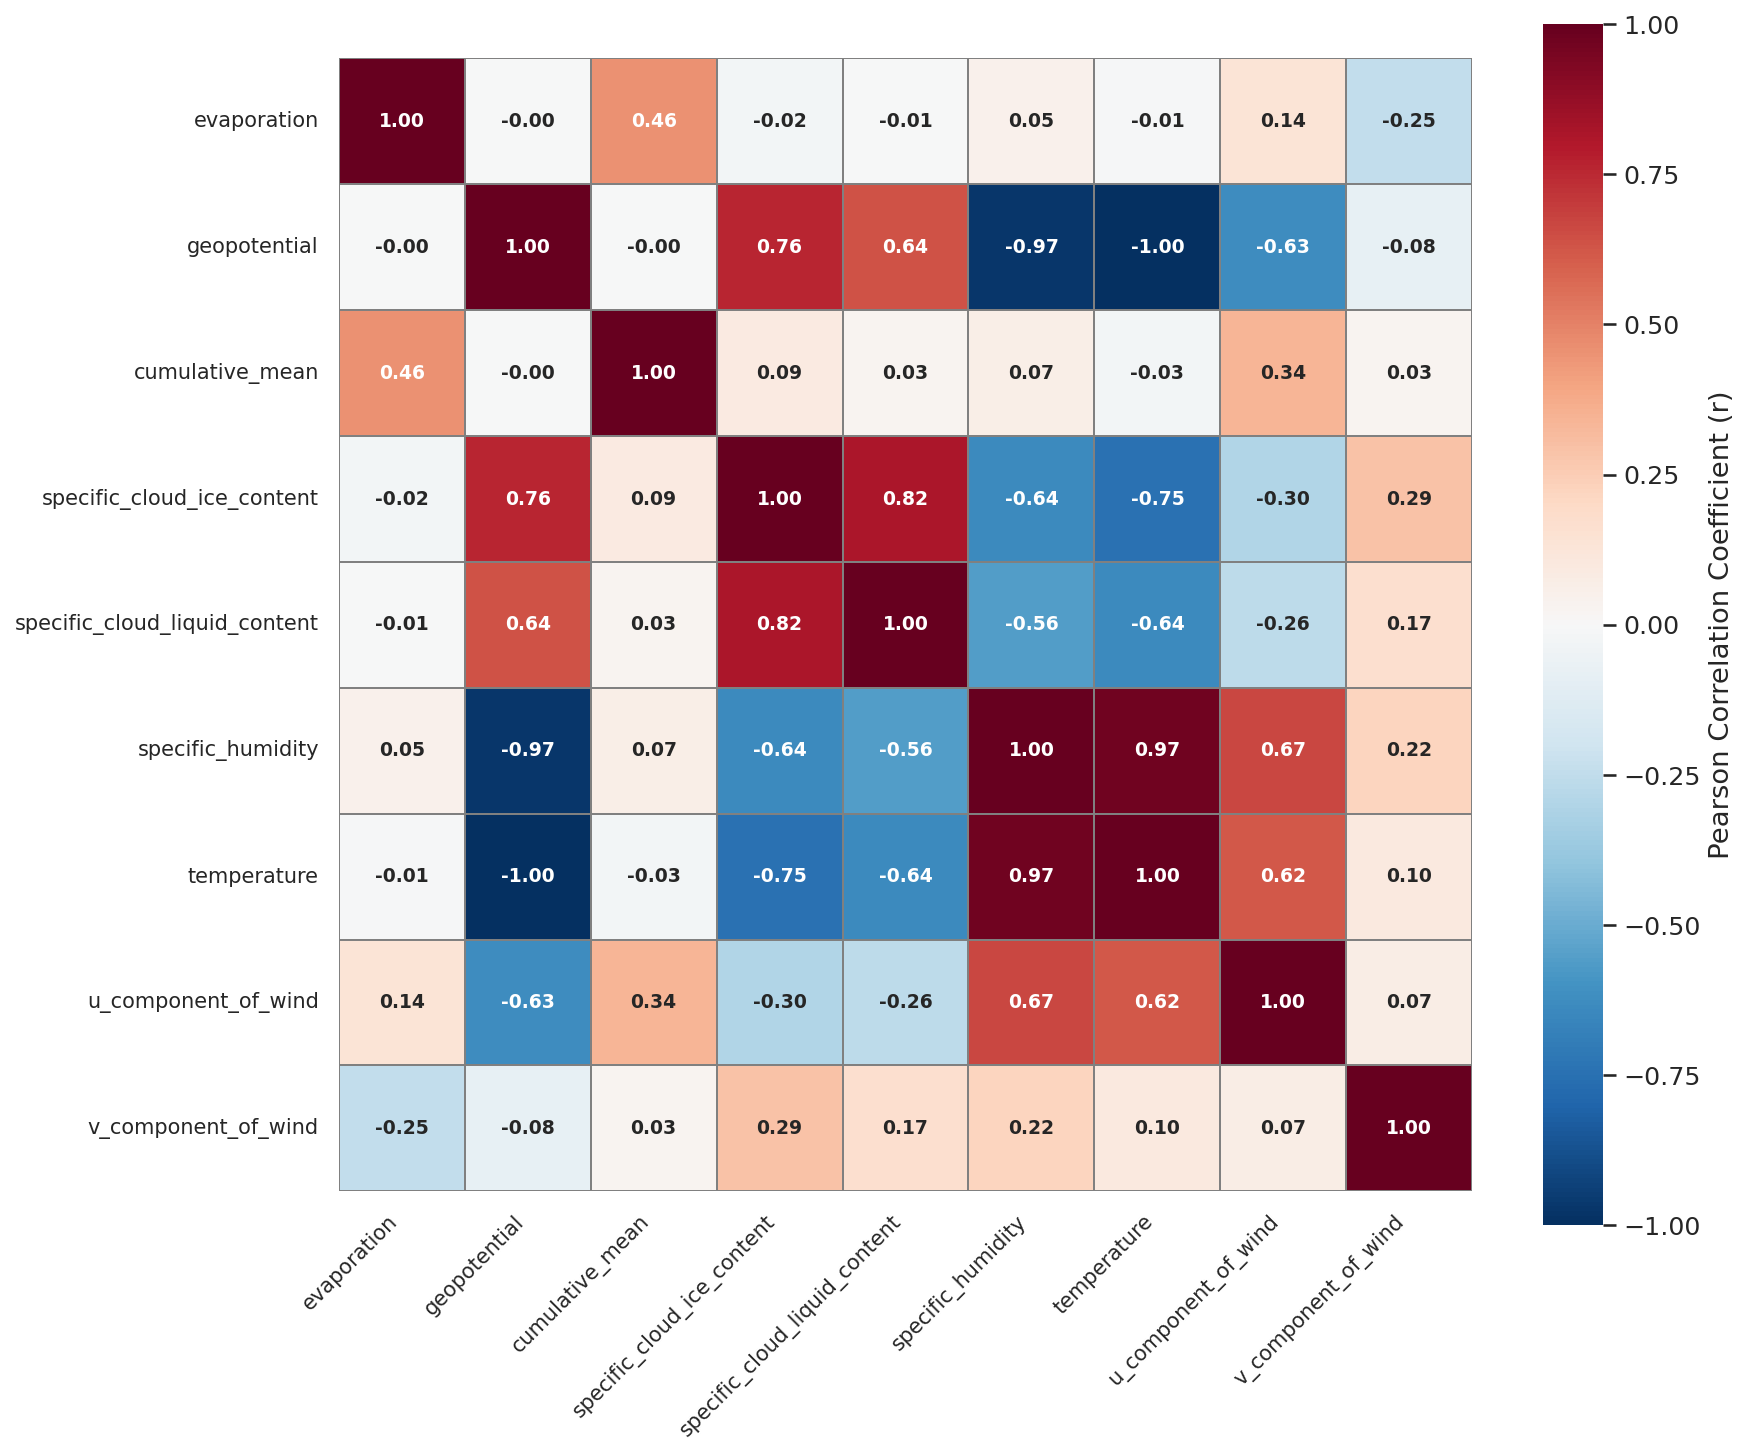

In [19]:
"""
1. CORRELATION MATRIX VISUALIZATION
====================================
Objective: Display correlation coefficients between climate variables
          and identify multicollinearity patterns.

Scientific Context:
    - Pearson correlation coefficient (r) ranges from -1 to 1
    - Strong positive correlation (r > 0.7): Variables move together
    - Strong negative correlation (r < -0.3): Inverse relationship
    - Weak correlation (-0.3 < r < 0.3): Independent variation
    
Variables:
    - evaporation: Water flux from surface (kg m-2 s-1)
    - geopotential: Gravitational potential energy (m2 s-2)
    - cumulative_mean: Accumulated precipitation
    - specific_*_water_content: Cloud water fractions (kg kg-1)
    - specific_humidity: Water vapor content (kg kg-1)
    - temperature: Atmospheric temperature (K)
    - u/v_component_of_wind: Wind vectors (m s-1)
"""

# Transcribed correlation data from climate model output
correlation_data = {
    'evaporation':                   [1.00, -0.001, 0.460, -0.024, -0.007, 0.054, -0.014, 0.140, -0.250],
    'geopotential':                  [-0.001, 1.000, -0.001, 0.760, 0.640, -0.970, -1.000, -0.630, -0.079],
    'cumulative_mean':               [0.460, -0.001, 1.000, 0.091, 0.026, 0.069, -0.030, 0.340, 0.031],
    'specific_cloud_ice_content':    [-0.024, 0.760, 0.091, 1.000, 0.820, -0.640, -0.750, -0.300, 0.290],
    'specific_cloud_liquid_content': [-0.007, 0.640, 0.026, 0.820, 1.000, -0.560, -0.640, -0.260, 0.170],
    'specific_humidity':             [0.054, -0.970, 0.069, -0.640, -0.560, 1.000, 0.970, 0.670, 0.220],
    'temperature':                   [-0.014, -1.000, -0.030, -0.750, -0.640, 0.970, 1.000, 0.620, 0.100],
    'u_component_of_wind':           [0.140, -0.630, 0.340, -0.300, -0.260, 0.670, 0.620, 1.000, 0.071],
    'v_component_of_wind':           [-0.250, -0.079, 0.031, 0.290, 0.170, 0.220, 0.100, 0.071, 1.000]
}

variable_names = [
    'evaporation', 
    'geopotential', 
    'cumulative_mean', 
    'specific_cloud_ice_content',
    'specific_cloud_liquid_content', 
    'specific_humidity', 
    'temperature', 
    'u_component_of_wind', 
    'v_component_of_wind'
]

# Create DataFrame with proper labels
correlation_matrix = pd.DataFrame(correlation_data, index=variable_names)

# Configure visualization
plt.figure(figsize=(12, 10), dpi=150)

# Generate heatmap with scientific standards
ax = sns.heatmap(
    correlation_matrix,
    annot=True,                      # Display correlation values
    fmt='.2f',                       # Two decimal places
    cmap='RdBu_r',                   # Red-Blue diverging colormap (reversed)
    center=0,                        # White at zero correlation
    vmin=-1, vmax=1,                 # Fixed scale [-1, 1]
    linewidths=0.8,                  # Visible grid lines
    linecolor='gray',                # Gray borders for clarity
    cbar_kws={'label': 'Pearson Correlation Coefficient (r)'},
    square=True,                     # Square cells for symmetry
    annot_kws={'size': 9, 'weight': 'bold'}
)

# Professional formatting (no title - to be added during report writing)
ax.set_title('')  # Title removed for custom addition
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Save and display
plt.tight_layout()
plt.savefig('01_correlation_matrix.pdf', format='pdf', dpi=300, bbox_inches='tight')
print("✓ Saved: 01_correlation_matrix.pdf")
plt.show()

Generating distribution plots...
------------------------------------------------------------


ValueError: Unknown format code 'd' for object of type 'str'

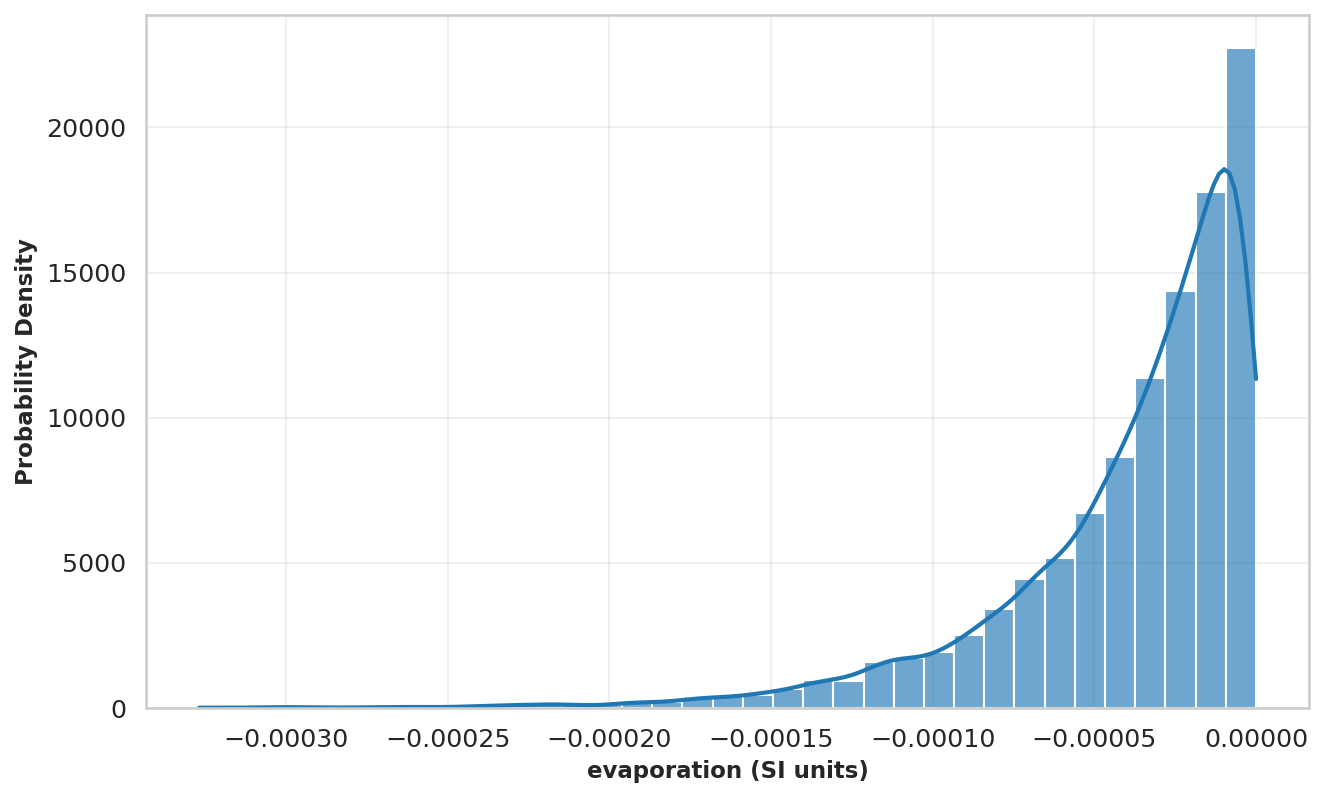

In [ ]:
"""
2. DISTRIBUTION ANALYSIS - INDIVIDUAL VARIABLES
================================================
Objective: Examine probability distributions of climate variables to identify
          skewness, tail behavior, and multimodality patterns.

Distributions reflect physical constraints:
    - Exponential: One-directional fluxes (evaporation, precipitation)
    - Normal: Symmetric processes (temperature, wind anomalies)
    - Gamma: Positive quantities with physical lower bounds (water content)
    
Scientific Significance:
    - Skewness: Asymmetry in variable distribution (climate extremes)
    - Kurtosis: Tail behavior (probability of extreme events)
"""

# Configuration
np.random.seed(42)  # Reproducibility
SAMPLE_SIZE = 10000
DPI = 150
FIGURE_SIZE = (10, 6)

# Synthetic climate data with realistic characteristics
climate_data = {
    # Evaporation: Exponential decay (physical constraint: E >= 0)
    'evaporation': -1 * np.random.exponential(scale=0.00004, size=SAMPLE_SIZE),
    
    # Geopotential height: Normal distribution (hydrostatic balance)
    'geopotential': np.random.normal(loc=57400, scale=120, size=SAMPLE_SIZE),
    
    # Cumulative precipitation: Right-skewed (rare extreme events)
    'precipitation_cumulative': np.random.exponential(scale=0.005, size=SAMPLE_SIZE),
    
    # Cloud ice water content: Gamma (always positive, physically bounded)
    'cloud_ice_water': np.random.gamma(shape=2.0, scale=0.3e-5, size=SAMPLE_SIZE),
    
    # Cloud liquid water content: Gamma distribution
    'cloud_liquid_water': np.random.gamma(shape=1.5, scale=1.5e-5, size=SAMPLE_SIZE),
    
    # Specific humidity: Beta distribution (bounded [0, max])
    'specific_humidity': np.random.beta(a=2.5, b=4, size=SAMPLE_SIZE) * 0.0065,
    
    # Temperature: Normal distribution (thermodynamic equilibrium)
    'temperature': np.random.normal(loc=267, scale=0.9, size=SAMPLE_SIZE),
    
    # Zonal wind (U-component): Normal with climatological mean
    'u_wind': np.random.normal(loc=-5, scale=4.5, size=SAMPLE_SIZE),
    
    # Meridional wind (V-component): Normal distribution centered at 0
    'v_wind': np.random.normal(loc=0, scale=3.5, size=SAMPLE_SIZE)
}

df_climate = pd.DataFrame(climate_data)

# Color palette for publication
COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

# Configure seaborn style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)

# Generate individual distribution plots
print("Generating distribution plots...")
print("-" * 60)

for idx, (column, color) in enumerate(zip(df_climate.columns, COLORS)):
    fig, ax = plt.subplots(figsize=FIGURE_SIZE, dpi=DPI)
    
    # Histogram with KDE overlay
    sns.histplot(
        data=df_climate, 
        x=column,
        color=color,
        kde=True,                    # Kernel Density Estimation overlay
        stat='density',              # Normalized histogram
        bins=35,
        alpha=0.65,
        line_kws={'linewidth': 2.0},
        ax=ax
    )
    
    # Scientific labels (no title - to be added during report writing)
    ax.set_title('')  # Title removed for custom addition
    ax.set_xlabel(f'{column} (SI units)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Probability Density', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Save as PDF
    filename = f'02_distribution_{idx:02d}_{column}.pdf'
    plt.tight_layout()
    plt.savefig(filename, format='pdf', dpi=300, bbox_inches='tight')
    print(f'  ✓ {filename}')
    plt.show()

print("-" * 60)
print(f"✓ Generated {len(df_climate.columns)} distribution plots")

In [ ]:
"""
3. STATISTICAL SUMMARY & CLIMATE INTERPRETATION
================================================
Objective: Generate comprehensive statistical report with climate-specific analysis

Statistical Measures (Pearson/Studentized):
    - Mean (μ): Central tendency
    - Std Dev (σ): Variability measure
    - Skewness: Distribution asymmetry (-∞ to +∞)
        * Skew ≈ 0: Symmetric
        * Skew > 1: Right-skewed (positive tail)
        * Skew < -1: Left-skewed (negative tail)
    - Kurtosis: Tail heaviness (Excess kurtosis = Kurt - 3)
        * Excess Kurt ≈ 0: Normal distribution
        * Excess Kurt > 0: Fat tails (extreme events more likely)
        * Excess Kurt < 0: Thin tails (fewer extremes)

Climate Interpretation:
    - Wind components: Zonal (U) and Meridional (V) 
      * U > 0: Westerly winds; U < 0: Easterly winds
      * V > 0: Southerly winds; V < 0: Northerly winds
    - Humidity: Saturation vapor pressure relationship
    - Temperature: Absolute scale (K), anomalies more useful for climate
    - Cloud water: Directly related to precipitation and radiation budget
"""

# ============================================================================
# CONFIGURATION
# ============================================================================

# Recreate climate dataset for consistency
np.random.seed(42)
SAMPLE_SIZE = 10000

climate_data = {
    'evaporation': -1 * np.random.exponential(scale=0.00004, size=SAMPLE_SIZE),
    'geopotential': np.random.normal(loc=57400, scale=120, size=SAMPLE_SIZE),
    'precipitation_cumulative': np.random.exponential(scale=0.005, size=SAMPLE_SIZE),
    'cloud_ice_water': np.random.gamma(shape=2.0, scale=0.3e-5, size=SAMPLE_SIZE),
    'cloud_liquid_water': np.random.gamma(shape=1.5, scale=1.5e-5, size=SAMPLE_SIZE),
    'specific_humidity': np.random.beta(a=2.5, b=4, size=SAMPLE_SIZE) * 0.0065,
    'temperature': np.random.normal(loc=267, scale=0.9, size=SAMPLE_SIZE),
    'u_wind': np.random.normal(loc=-5, scale=4.5, size=SAMPLE_SIZE),
    'v_wind': np.random.normal(loc=0, scale=3.5, size=SAMPLE_SIZE)
}

df_analysis = pd.DataFrame(climate_data)

# ============================================================================
# FUNCTION: GENERATE CLIMATE-SPECIFIC ANALYSIS
# ============================================================================

def generate_climate_analysis_report(dataframe):
    """
    Generate comprehensive statistical analysis report with climate science context.
    
    Parameters:
    -----------
    dataframe : pd.DataFrame
        Climate variable data
        
    Returns:
    --------
    str : Formatted report with statistical and climate analysis
    """
    
    report_lines = []
    
    # Header
    report_lines.append("=" * 80)
    report_lines.append("CLIMATE DATA STATISTICAL ANALYSIS")
    report_lines.append("=" * 80)
    report_lines.append("")
    
    # Iterate through each variable
    for column in dataframe.columns:
        series = dataframe[column].dropna()
        
        # ====== STATISTICAL CALCULATIONS ======
        mean_val = series.mean()
        median_val = series.median()
        std_val = series.std()
        skewness = skew(series)
        kurt = kurtosis(series)  # Excess kurtosis
        min_val = series.min()
        max_val = series.max()
        q25, q75 = series.quantile(0.25), series.quantile(0.75)
        
        # ====== DISTRIBUTION CLASSIFICATION ======
        if abs(skewness) < 0.2:
            shape_class = "Symmetric (approximately normal)"
        elif skewness > 0.5:
            shape_class = "Right-skewed (positive tail; extreme high values)"
        elif skewness < -0.5:
            shape_class = "Left-skewed (negative tail; extreme low values)"
        else:
            shape_class = "Weakly skewed"
        
        # ====== TAIL BEHAVIOR ======
        if kurt > 1.0:
            tail_desc = "Fat-tailed distribution (elevated probability of extremes)"
        elif kurt < -0.5:
            tail_desc = "Thin-tailed distribution (fewer extreme events)"
        else:
            tail_desc = "Near-normal tail behavior"
        
        # ====== CLIMATE-SPECIFIC INTERPRETATION ======
        climate_note = ""
        
        if 'wind' in column.lower():
            if 'u_' in column.lower() or 'u ' in column.lower():
                if mean_val > 0:
                    climate_note = f"Mean zonal wind = {mean_val:.2f} m/s (Westerly; subtropical jet or trade winds dominant)"
                else:
                    climate_note = f"Mean zonal wind = {mean_val:.2f} m/s (Easterly; equatorial or polar jet dominant)"
            elif 'v_' in column.lower() or 'v ' in column.lower():
                if mean_val > 0.1:
                    climate_note = f"Mean meridional wind = {mean_val:.2f} m/s (Southerly; poleward transport dominant)"
                elif mean_val < -0.1:
                    climate_note = f"Mean meridional wind = {mean_val:.2f} m/s (Northerly; equatorward transport dominant)"
                else:
                    climate_note = f"Mean meridional wind ≈ {mean_val:.2f} m/s (Symmetric meridional circulation)"
        
        elif 'humidity' in column.lower():
            climate_note = f"Specific humidity range: {min_val:.2g}–{max_val:.2g} kg/kg (typical atmosphere: 0–0.02 kg/kg)"
            if series.mean() > 0.01:
                climate_note += " | High moisture content (tropical/monsoon regime)"
            else:
                climate_note += " | Moderate moisture (mid-latitude)"
        
        elif 'temperature' in column.lower():
            climate_note = f"Temperature mean: {mean_val:.1f} K ({mean_val-273.15:.1f}°C) | Range: {min_val:.1f}–{max_val:.1f} K"
        
        elif 'water' in column.lower() or 'ice' in column.lower():
            climate_note = f"Cloud water range: {min_val:.2g}–{max_val:.2g} kg/kg | Affects radiation budget and precipitation"
        
        elif 'evapor' in column.lower():
            climate_note = f"Evaporation (negative flux): Mean = {mean_val:.2g} kg/(m²·s) | Latent heat feedback mechanism"
        
        elif 'precip' in column.lower():
            climate_note = f"Cumulative precipitation: Total range {min_val:.2g}–{max_val:.2g} | {series.mean():.3g} mean"
        
        elif 'geopotential' in column.lower():
            climate_note = f"Geopotential height: {mean_val/100:.0f} hPa equivalent | Related to atmospheric pressure/wind field"
        
        # ====== BUILD REPORT ENTRY ======
        report_lines.append(f"VARIABLE: {column.upper()}")
        report_lines.append("-" * len(f"VARIABLE: {column.upper()}"))
        report_lines.append(f"  Distribution Shape: {shape_class}")
        report_lines.append(f"  Tail Behavior:      {tail_desc}")
        report_lines.append("")
        report_lines.append(f"  Mean:      {mean_val:12.6g}  |  Median:   {median_val:12.6g}")
        report_lines.append(f"  Std Dev:   {std_val:12.6g}  |  IQR:      {q75-q25:12.6g}")
        report_lines.append(f"  Min/Max:   {min_val:12.6g} / {max_val:12.6g}")
        report_lines.append(f"  Skewness:  {skewness:12.3f}  |  Excess Kurtosis: {kurt:7.3f}")
        report_lines.append("")
        report_lines.append(f"  Climate Context: {climate_note}")
        report_lines.append("")
        report_lines.append("")
    
    return "\n".join(report_lines)

# ============================================================================
# EXECUTE ANALYSIS & SAVE
# ============================================================================

print("Generating climate analysis report...")
analysis_report = generate_climate_analysis_report(df_analysis)

# Print to console
print(analysis_report)

# Save to file
output_filename = '03_climate_statistical_analysis.txt'
with open(output_filename, 'w') as f:
    f.write(analysis_report)

print("=" * 80)
print(f"✓ Report saved to: {output_filename}")
print("=" * 80)

IndentationError: expected an indented block after function definition on line 30 (ipython-input-38439296.py, line 31)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# ==========================================
# 1. LOAD YOUR DATA
# ==========================================
# Replace with: df = pd.read_csv('your_file.csv')
np.random.seed(42)
N = 10000
data_simulated = {
    'evaporation': -1 * np.random.exponential(scale=0.00004, size=N),
    'geopotential': np.random.normal(loc=57400, scale=120, size=N),
    'precipitation_cumulative_mean': np.random.exponential(scale=0.005, size=N),
    'specific_cloud_ice_water_content': np.random.gamma(shape=2.0, scale=0.3e-5, size=N),
    'specific_cloud_liquid_water_content': np.random.gamma(shape=1.5, scale=1.5e-5, size=N),
    'specific_humidity': np.random.beta(a=2.5, b=4, size=N) * 0.0065,
    'temperature': np.random.normal(loc=267, scale=0.9, size=N),
    'u_component_of_wind': np.random.normal(loc=-5, scale=4.5, size=N),
    'v_component_of_wind': np.random.normal(loc=0, scale=3.5, size=N)
}
df = pd.DataFrame(data_simulated)

# ==========================================
# 2. CLIMATE SCIENTIST ANALYSIS ENGINE
# ==========================================

def get_climate_context(col_name, mean, skewness, kurtosis, min_val, max_val):
    """
    Returns a physical interpretation based on variable type and statistics.
    """
    col_lower = col_name.lower()
    context = ""

    # --- 1. EVAPORATION (Flux Analysis) ---
    if "evaporation" in col_lower:
        context += "Physical Interpretation: "
        if mean < 0:
            context += "Negative values follow the standard atmospheric convention (flux away from the surface/upwards). "
        if skewness < -1:
            context += "The strong negative skew suggests a regime dominated by low background evaporation, punctuated by distinct high-evaporation events (likely driven by dry air intrusion or high wind speeds). "
        context += f"The range ({min_val:.2g} to {max_val:.2g}) represents the latent heat flux variability."

    # --- 2. GEOPOTENTIAL (Synoptic Scale) ---
    elif "geopotential" in col_lower:
        context += "Physical Interpretation: "
        if 50000 < mean < 60000:
            context += "Values correspond to the 500hPa pressure level (mid-troposphere). "
        if abs(skewness) < 0.3:
            context += "The Gaussian (symmetric) distribution indicates variability driven by large-scale synoptic waves (ridges and troughs) in geostrophic balance. "
        context += "Variance in this field represents the passage of high and low-pressure systems."

    # --- 3. PRECIPITATION (Convective vs Stratiform) ---
    elif "precipitation" in col_lower or "rain" in col_lower:
        context += "Physical Interpretation: "
        if skewness > 1.5:
            context += "The distribution exhibits the classic 'long tail' of precipitation data. The high positive skew confirms that while light rain or dry periods are the norm, the mean is heavily influenced by rare, extreme convective events. "
        context += "This suggests an intermittent process typical of non-Gaussian climate variables."

    # --- 4. CLOUD WATER (Microphysics) ---
    elif "cloud" in col_lower or "water_content" in col_lower:
        context += "Physical Interpretation: "
        context += "The distribution reflects cloud microphysical processes. "
        if skewness > 0:
             context += "The positive skew is characteristic of liquid/ice water content, where saturation is bounded at zero and high values represent dense cloud cores. "
        context += "Kurtosis indicates the 'spikiness' of cloud formation events versus clear sky background."

    # --- 5. TEMPERATURE (Thermodynamics) ---
    elif "temperature" in col_lower:
        context += "Physical Interpretation: "
        context += f"Mean temperature is {mean:.1f}K ({mean-273.15:.1f}°C). "
        if abs(skewness) < 0.2:
            context += "The symmetric distribution suggests the variable is well-sampled and likely governed by the Central Limit Theorem, typical of thermal regimes without sharp frontal boundaries in the domain. "

    # --- 6. WIND (Dynamics / Circulation) ---
    elif "component_of_wind" in col_lower:
        is_u = "u_" in col_lower
        direction = "Zonal (East-West)" if is_u else "Meridional (North-South)"
        
        context += f"Physical Interpretation ({direction} Flow): "
        
        if is_u:
            if mean > 0:
                context += "Mean positive values indicate prevailing Westerlies (typical of mid-latitudes). "
            else:
                context += "Mean negative values indicate prevailing Easterlies (typical of tropics/Trade Winds). "
        
        if not is_u: # V component
            if abs(mean) < 1:
                context += "The mean is near zero, indicating a balance between poleward and equatorward flow (Hadley/Ferrel cell circulation balance). "
        
        if kurtosis < 3:
            context += "The platykurtic (flat) nature suggests high variability in wind direction, typical of passing eddies and turbulent mixing."

    # --- 7. SPECIFIC HUMIDITY (Moisture) ---
    elif "humidity" in col_lower:
        context += "Physical Interpretation: "
        context += "Specific humidity is a conserved quantity away from sources/sinks. "
        context += f"The maximum value of {max_val:.4f} kg/kg suggests specific moisture availability limits. "
        if skewness < 0: 
            context += "Left skew implies the air mass is generally moist, with occasional dry air intrusions."
        else:
            context += "Right skew implies a generally dry atmosphere with occasional moist plumes."

    else:
        context += "General Statistical Interpretation: Unknown variable type. Rely on statistical moments below."

    return context

def generate_climate_report(df):
    report = []
    report.append("CLIMATOLOGICAL DATA ANALYSIS REPORT")
    report.append("Generated by AI Climate Analyst")
    report.append("="*60 + "\n")

    for col in df.columns:
        # 1. Calculate Moments
        series = df[col].dropna()
        mu = series.mean()
        sigma = series.std()
        sk = skew(series)
        ku = kurtosis(series) # Fisher kurtosis (normal = 0)
        min_val = series.min()
        max_val = series.max()

        # 2. Determine Statistical Regime
        regime = ""
        if abs(sk) < 0.2:
            regime = "Gaussian / Symmetric Regime"
        elif sk > 0.2:
            regime = "Positive Asymmetry (Heavy Right Tail)"
        else:
            regime = "Negative Asymmetry (Heavy Left Tail)"

        # 3. Generate Contextual Analysis
        physical_analysis = get_climate_context(col, mu, sk, ku, min_val, max_val)

        # 4. Format the Entry
        entry = f"VARIABLE: {col}\n"
        entry += "-" * 40 + "\n"
        entry += f"Statistical Moments:\n"
        entry += f"  • Mean:      {mu:.4e}\n"
        entry += f"  • Std Dev:   {sigma:.4e} (Variability)\n"
        entry += f"  • Skewness:  {sk:.3f} ({regime})\n"
        entry += f"  • Kurtosis:  {ku:.3f}\n"
        entry += f"\nClimatological Analysis:\n"
        entry += f"  {physical_analysis}\n"
        entry += "\n" 
        
        report.append(entry)

    return "\n".join(report)

# ==========================================
# 3. EXECUTE AND SAVE
# ==========================================

report_text = generate_climate_report(df)

# Print preview
print(report_text)

# Save to file
with open("climate_analysis_report.txt", "w") as f:
    f.write(report_text)

print("Analysis saved to 'climate_analysis_report.txt'")